In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from lib.utils import shift_change_points
from scipy.signal import argrelextrema

In [2]:
pair_dir = 'pair'
aug_dir = 'augment'

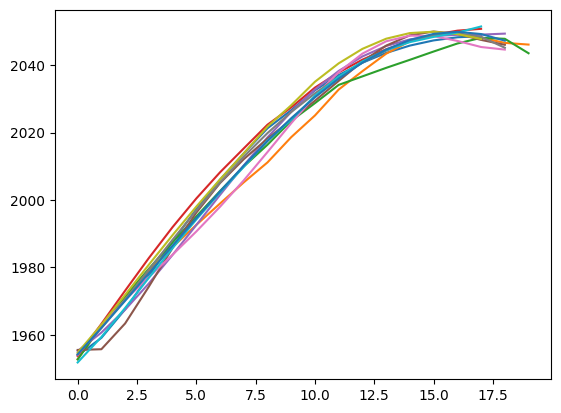

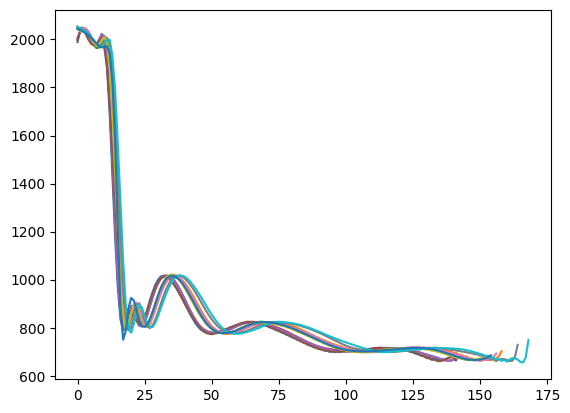

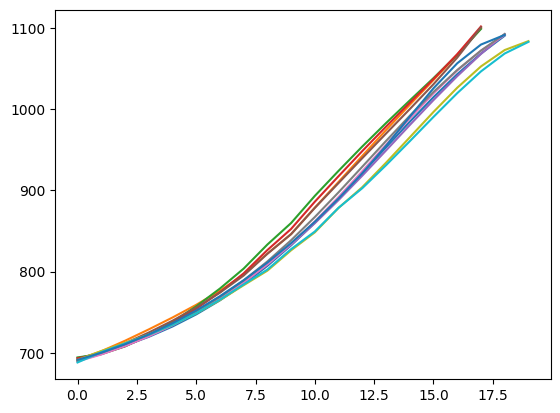

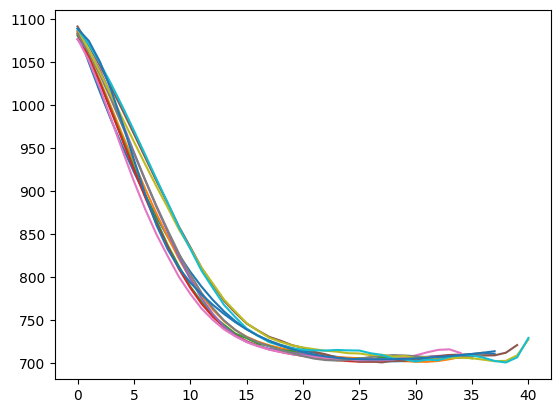

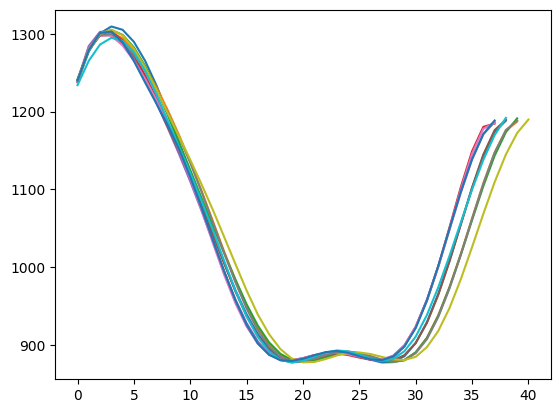

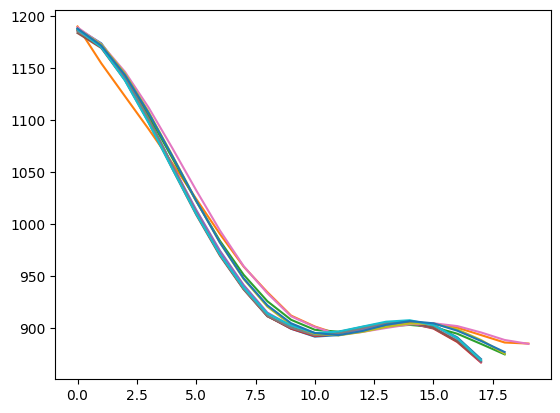

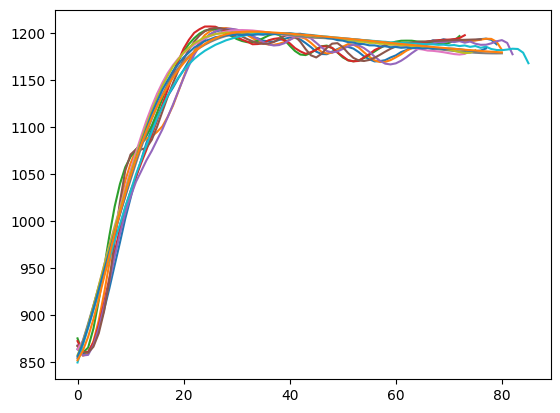

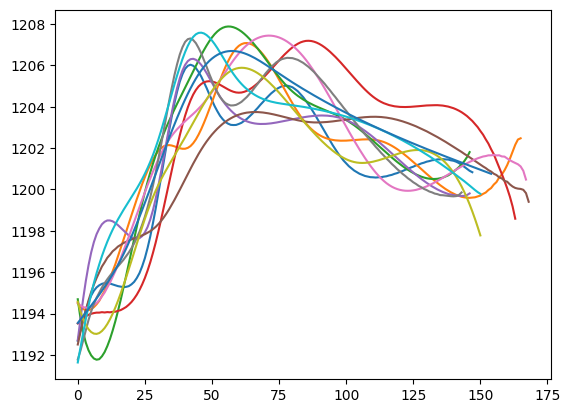

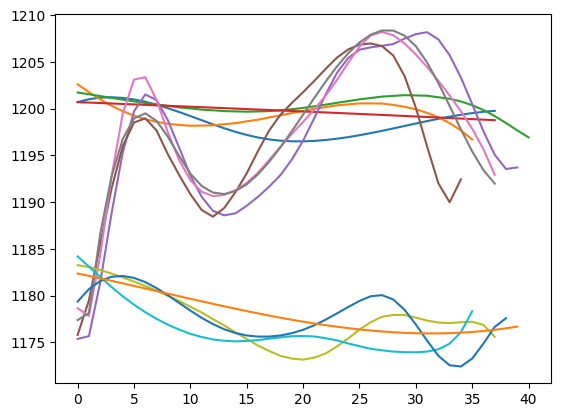

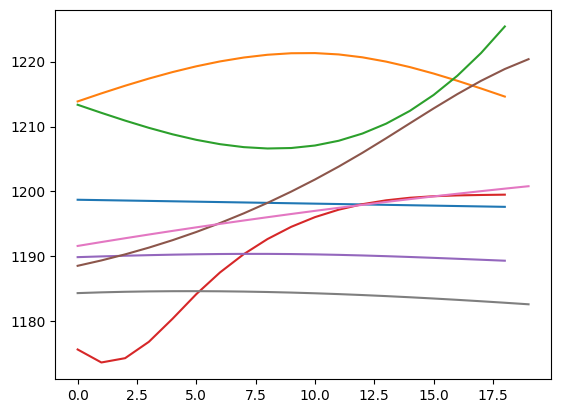

ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0

In [8]:
count = 0
for pair_folder in os.listdir(pair_dir):
    num_shift = 20 // len(os.listdir(os.path.join(pair_dir, pair_folder)))

    os.makedirs(os.path.join(aug_dir, pair_folder), exist_ok=True)
    for segment_name in os.listdir(os.path.join(pair_dir, pair_folder)):
        if not segment_name.endswith('.npy'):
            continue
            
        segment = np.load(os.path.join(pair_dir, pair_folder, segment_name))
        shifted = shift_change_points(segment, num_shift, 5)
        shifted.append(segment)
    
        for i in range(len(shifted)):
            if count < 20:
                plt.plot(shifted[i])
            np.save(f'{aug_dir}/{pair_folder}/{segment_name[:-4]}{i}.npy', shifted[i])

        count += 1
    
    plt.show()